In [138]:
import qiskit
from qiskit import Aer, QuantumCircuit, execute
from qiskit.visualization import plot_histogram

In [139]:
circuitHalfAdder = QuantumCircuit(4,2)

case = 4

if case == 2:
    circuitHalfAdder.x(0)
elif case == 3:
    circuitHalfAdder.x(1)
elif case == 4:
    circuitHalfAdder.x(0)
    circuitHalfAdder.x(1)

circuitHalfAdder.barrier()

#AND gate (1 bit)
circuitHalfAdder.ccx(0,1,2)

#XOR gate (2 bit)
circuitHalfAdder.cx(0,3)
circuitHalfAdder.cx(1,3)

#Measure bits
circuitHalfAdder.barrier()
circuitHalfAdder.measure(2,1)
circuitHalfAdder.measure(3,0)
circuitHalfAdder.draw()

┌───┐ ░                 ░       
q_0: ┤ X ├─░───■────■────────░───────
     ├───┤ ░   │    │        ░       
q_1: ┤ X ├─░───■────┼────■───░───────
     └───┘ ░ ┌─┴─┐  │    │   ░ ┌─┐   
q_2: ──────░─┤ X ├──┼────┼───░─┤M├───
           ░ └───┘┌─┴─┐┌─┴─┐ ░ └╥┘┌─┐
q_3: ──────░──────┤ X ├┤ X ├─░──╫─┤M├
           ░      └───┘└───┘ ░  ║ └╥┘
c: 2/═══════════════════════════╩══╩═
                                1  0

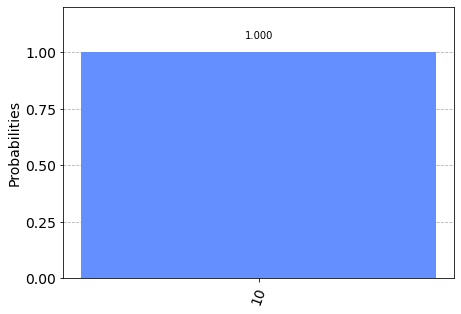

In [140]:
counts = execute(circuitHalfAdder,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)